# 1. Hello Qiskit (A Quick Introduction)

Author : [Gwonhak Lee](https://github.com/snow0369) (gwonhak@gmail.com)


-----

 Qiskit 활용의 간단한 예시로써, Bell 상태 측정에 대한 회로를 구현하고, CPU를 이용한 양자회로 시뮬레이션을 수행합니다.


$ | \text{Bell}_{00}\rangle = \frac {1} {\sqrt{2}} (| 00 \rangle + | 11 \rangle $)

기본적인 qiskit 개발의 단계는 다음과 같이 생각할 수 있습니다.

1. 양자회로 구성
    1. 객체의 선언 (qubits, classical bits, quantum circuit)
    2. 게이트를 적용하여 회로 구성

2. 양자회로 실행
    1. 양자실험 (시뮬레이션 혹은 실제 양자프로세서)
    2. 결과 획득 및 시각화

각 단계에 대한 예시를 구체적으로 살펴보도록 하겠습니다.

### 0. 필요한 요소 불러오기

 먼저 필요한 Package를 불러옵니다.

In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.providers.aer import AerProvider
from qiskit import execute

### 1-1. 양자회로 구현을 위한 객체 선언

 다음으로, 회로 구현에 필요한 양자 및 고전 bit 레지스터(저장공간)와 양자회로를 선언합니다.

 Bell state를 구현하기 위해 2개의 qubit과, 이를 측정하는 2개의 Classical bit,
 그리고 이들을 포함하는 양자회로를 선언합니다.

In [8]:
qr = QuantumRegister(2) # 2 qubits
cr = ClassicalRegister(2) # 2 classical bits
qc = QuantumCircuit(qr, cr) # a quantum circuit with 2 qubits and 2 bits

다음으로, 선언한 양자회로를 출력하여 확인합니다.

(아직 어떠한 게이트도 놓지 않았기 때문에 빈 회로가 출력됩니다.)

In [9]:
qc.draw()

q12_0: 
       
q12_1: 
       
 c1: 2/

### 1-2. Bell 회로 구성

 다음 식과 같은 순서로 양자연산을 수행하여 Bell상태를 준비하는 회로를 구현합니다.

 ![Bell state prep](https://github.com/snow0369/qiskit_tutorial_2021_summerschool/raw/master/figures/bell_state_prep.png)

 0번째 qubit에 hadamard 연산과 0번째, 1번째 qubit에 cnot 연산을 취한 뒤, 측정하여 `cr`에 저장합니다.

- 초기에 모든 qubit은 $|0\rangle$ 상태로 준비되어있습니다.
- 회로를 출력할 때, `'mpl'` 옵션을 넣어 텍스트가 아닌 그림 형태로 출력할 수 있습니다.
- 활용할 수 있는 gate의 종류는 [qiskit document](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html)
에서 확인할 수 있습니다.
https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html

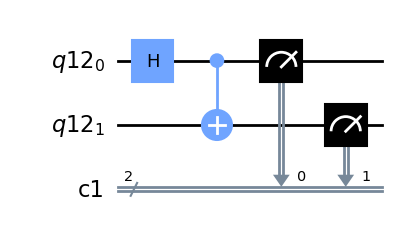

In [10]:
qc.h(qr[0]) # 0번째 qubit에 hadamard 연산을 취합니다.
qc.cx(qr[0], qr[1]) # 0번째 qubit을 control, 1번째 qubit를 target으로 하는 CNOT 연산을 취합니다.
qc.measure(qr, cr) # qr을 측정하여 cr에 저장하는 측정 연산을 취합니다.

qc.draw('mpl') # 완성된 회로를 출력합니다.

### 2-1. QASM 시뮬레이션

backend는 양자회로를 실행하기 위한 시뮬레이터 또는 실제 양자 프로세서입니다.
앞서 구성한 회로를 시뮬레이션 하기위해 먼저 qasm simulator backend를 불러옵니다.

- `AerProvider()`는 Local PC를 이용하는 시뮬레이션 backend를 제공합니다. [(2번째 튜토리얼)](./2_simulators.ipynb)
- `IBMQProvider()`는 IBM의 양자 프로세서 또는 고성능 클라우드를 이용한 시뮬레이션 backend를 제공합니다. [(3번째 튜토리얼)](./3_running_on_IBMQ.ipynb)
- `FakeProvider()`는 IBM의 양자 프로세서의 특성(qubit connectivity, noise model 등)을 반영한 Local 시뮬레이션 backend를 제공합니다.

In [11]:
qasm_simulator = AerProvider().get_backend('qasm_simulator')

다음으로, 실험을 진행하고 결과값을 얻습니다.

QASM 시뮬레이터에서는 실제 양자프로세서와 같이 `shots = 2048`에 해당하는 횟수의 동일한 양자실험을 반복하여 결과의 횟수
를 확인할 수 있습니다.

`get_counts()`를 통해 얻은 실험결과는 python의 기본 자료구조인 dictionary(`Dict[str, int]`)의 형태로,
Pauli-Z(Computational) basis에서 측정된 bitstring을 key로 하고 outcome의 횟수를 value로 합니다.

앞선 Bell State를 나타내는 식에서, $|00\rangle$상태와 $|11\rangle$ 이 동일한 확률로 관측될 것으로 예상되고
이를 확인할 수 있습니다.

- 양자회로를 실행하기 위한 방법으로는 `execute()`, `backend.run()` 그리고 `QuantumInstance`를 이용하는 방법 등이 있습니다.

In [12]:
job_qasm = execute(qc, backend=qasm_simulator, shots=2048)

# 다른 방법
# job_qasm = qasm_simulator.run(qc, shots=2048)
#
# 또는
#
# from qiskit.utils import QuantumInstance
# qi = QuantumInstance(qasm_simulator, shots=2048)
# result = qi.execute(qc)
# counts = result.get_counts()

counts = job_qasm.result().get_counts()

print("Bell measurement result")
for k, v in counts.items():
    print(k, v)

Bell measurement result
11 984
00 1064


얻은 결과를 다음과 같이 시각화 할 수도 있습니다.

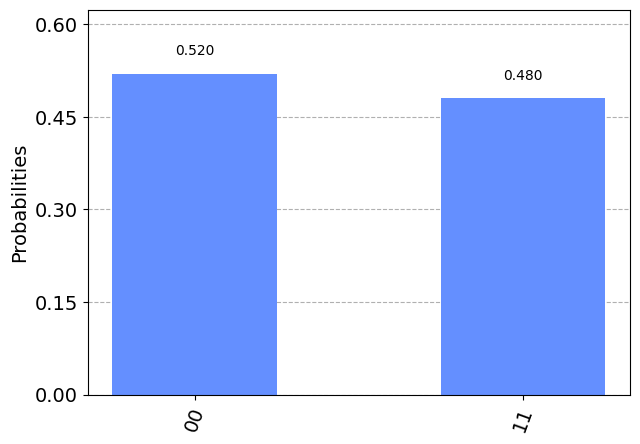

In [13]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)